In [51]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
mat = scipy.io.loadmat('SonarAlt.mat')["sonarAlt"][0]
measures = np.arange(0,len(mat))


In [53]:
sensor_data = {
    "sample":measures,
    "sensor_data":mat}
print(sensor_data)

{'sample': array([   0,    1,    2, ..., 1498, 1499, 1500]), 'sensor_data': array([34.25491256, 33.60223519, 33.60223519, ..., 36.55540305,
       36.55540305, 36.55540305])}


In [54]:
data = pd.DataFrame(sensor_data)

measures = data.shape[0]
#data["sample"] = np.arange(0,data.shape[0])
data["mov_avg_filter"] = np.zeros((measures,1))
data["full_avg_gilter"] = np.zeros((measures,1))

window_size = 30

data.head(10)

,sample,sensor_data,mov_avg_filter,full_avg_gilter
0,0,34.254913,0.0,0.0
1,1,33.602235,0.0,0.0
2,2,33.602235,0.0,0.0
3,3,33.602235,0.0,0.0
4,4,33.602235,0.0,0.0
5,5,34.254913,0.0,0.0
6,6,33.510678,0.0,0.0
7,7,33.419532,0.0,0.0
8,8,33.510678,0.0,0.0
9,9,34.254913,0.0,0.0


In [56]:
for index in data["sample"]:

    if index + 1 <= window_size:
        data.loc[index,"mov_avg_filter"] = data.loc[index,"sensor_data"]
    else:
        current_measure = data.loc[index,"sensor_data"]
        measure_k_n = data.loc[index - window_size,"sensor_data"]
        data.loc[index,"mov_avg_filter"] = data.loc[index-1,"mov_avg_filter"] + ((current_measure - measure_k_n)/window_size)

data.head(10)

,sample,sensor_data,mov_avg_filter,full_avg_gilter
0,0,34.254913,34.254913,0.0
1,1,33.602235,33.602235,0.0
2,2,33.602235,33.602235,0.0
3,3,33.602235,33.602235,0.0
4,4,33.602235,33.602235,0.0
5,5,34.254913,34.254913,0.0
6,6,33.510678,33.510678,0.0
7,7,33.419532,33.419532,0.0
8,8,33.510678,33.510678,0.0
9,9,34.254913,34.254913,0.0


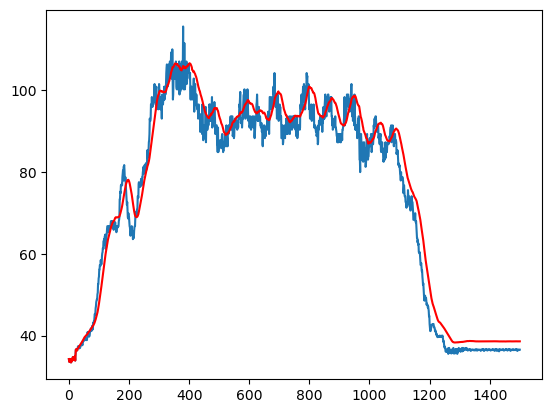

In [57]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["sample"],data["sensor_data"],label='sensor_data')
axes.plot(data["sample"],data["mov_avg_filter"],color='r', label="filtered signal")
